# Introduction to doing Zindi Data Science Challenges in R
## Data Science Nigeria Challenge #1: Loan Default Prediction 
**Challenge: ** It is your job to predict if a loan was good or bad, i.e. accurately predict binary outcome variable, where Good is 1 and Bad is 0.

### Data Science Terminology
**Training data**: data used to build the model  
**Test data**: data used to evaluate the model  
**Algorithm**:  a step-by-step process or set of rules to be executed to solve a problem, typically by a computer  
**Classifier**: algorithm that performs a classification task  
**Normalisation**:  technique for standardising and scaling the data range (also called feature scaling)

### Useful Links for Getting Started with Machine Learning in R
[Machine Learning Mastery](Machine Learning Mastery)  
[Data Camp](https://www.datacamp.com/community/tutorials/machine-learning-in-r)  
[r-bloggers](https://www.r-bloggers.com/evaluating-logistic-regression-models/)

### Overview of Steps
1. (down)load the training and test data
2. get to know your data: summarise and visualise
3. prepare your data: merge data, remove outliers and missing values, normalisation, feature extraction
4. create validation dataset
5. build a model
6. evaluate your model

### Install and Load Packages

In [62]:
library(caret)
library(dplyr)
library(readr)
library(repr) #for controlling plots in jupyter notebook
options(repr.plot.width=6, repr.plot.height=4) #sets plot size

## Load Data Set

Download the [data](https://zindi.africa/competitions/data-science-nigeria-challenge-1-loan-default-prediction/data) into a `data/` directory in your project root folder. This makes it easy to retrieve and load the data.

In [3]:
# load the training data files from the local directory
train_demo_data <- read.csv("data/traindemographics.csv", header=TRUE)
train_perf_data <- read.csv("data/trainperf.csv", header=TRUE)
#train_prevloans_data <- read.csv("data/trainprevloans.csv", header=TRUE)

# load the test data files from the local directory
test_demo_data <- read.csv("data/testdemographics.csv", header=TRUE)
test_perf_data <- read.csv("data/testperf.csv", header=TRUE)
#test_prevloans_data <- read.csv("data/testprevloans.csv", header=TRUE)

## Get to Know the Data
### train_demo_data

In [53]:
viz_data <- train_demo_data

# Dataset dimensions
cat('Dim: ', dim(viz_data), '\n\n')

# Dataset attribute types
sapply(viz_data, class)
head(viz_data)

Dim:  4346 9 



customerid                  birthdate 
                  "factor"                   "factor" 
         bank_account_type              longitude_gps 
                  "factor"                  "numeric" 
              latitude_gps          bank_name_clients 
                 "numeric"                   "factor" 
       bank_branch_clients  employment_status_clients 
                  "factor"                   "factor" 
level_of_education_clients 
                  "factor"

customerid                       birthdate                  bank_account_type
1 8a858e135cb22031015cbafc76964ebd 1973-10-10 00:00:00.000000 Savings          
2 8a858e275c7ea5ec015c82482d7c3996 1986-01-21 00:00:00.000000 Savings          
3 8a858e5b5bd99460015bdc95cd485634 1987-04-01 00:00:00.000000 Savings          
4 8a858efd5ca70688015cabd1f1e94b55 1991-07-19 00:00:00.000000 Savings          
5 8a858e785acd3412015acd48f4920d04 1982-11-22 00:00:00.000000 Savings          
6 8a858f045bc9690c015bca251e9a4e95 1978-12-11 00:00:00.000000 Savings          
  longitude_gps latitude_gps bank_name_clients bank_branch_clients
1 3.319219       6.528604    GT Bank                              
2 3.325598       7.119403    Sterling Bank                        
3 5.746100       5.563174    Fidelity Bank                        
4 3.362850       6.642485    GT Bank                              
5 8.455332      11.971410    GT Bank                              
6 3.330087       6.552518    GT Bank                              
  employment_status_clients level_of_education_clients
1                                                     
2 Permanent                                           
3                                                     
4 Permanent                                           
5 Permanent                                           
6 Permanent

In [5]:
# Values of attributes
attribute <- 'employment_status_clients'
print(unique(viz_data[attribute]))

# Frequency distribution of attribute values
percentage <- prop.table(table(viz_data[attribute])) * 100
cbind(freq=table(viz_data[attribute]), percentage=percentage)

     employment_status_clients
1                             
2                    Permanent
13                     Student
20               Self-Employed
48                  Unemployed
590                    Retired
1145                  Contract


freq percentage 
               648 14.91026231
Contract         1  0.02300966
Permanent     3146 72.38840313
Retired          4  0.09203866
Self-Employed  348  8.00736309
Student        142  3.26737230
Unemployed      57  1.31155085

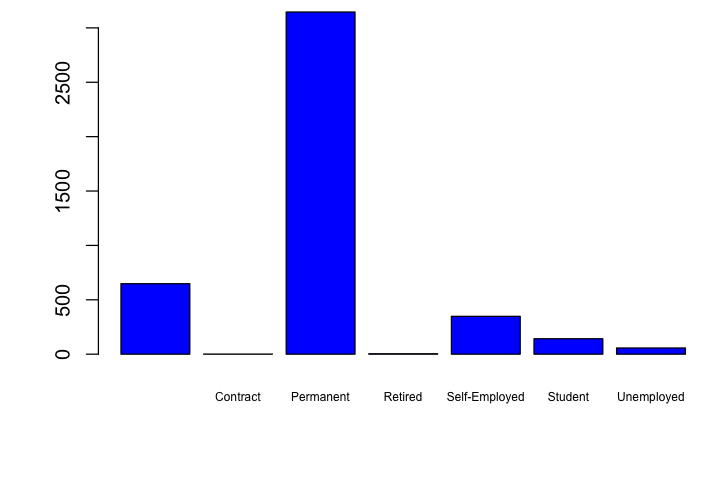

In [6]:
# Visualise attribute values -> choose bar plot for factor variables
mar <- par("mar")
mar[c(3,4)] <- 0.5
par(mar=mar)
plot(viz_data[attribute], col="blue", cex.names=0.6)

In [7]:
# Summary
summary(viz_data[-(1:2)])

 bank_account_type longitude_gps       latitude_gps        bank_name_clients
 Current:  56      Min.   :-118.247   Min.   :-33.869   GT Bank     :1598   
 Other  : 865      1st Qu.:   3.355   1st Qu.:  6.471   First Bank  : 590   
 Savings:3425      Median :   3.593   Median :  6.622   Access Bank : 432   
                   Mean   :   4.626   Mean   :  7.251   UBA         : 353   
                   3rd Qu.:   6.545   3rd Qu.:  7.425   Zenith Bank : 301   
                   Max.   : 151.209   Max.   : 71.228   Diamond Bank: 282   
                                                        (Other)     : 790   
    bank_branch_clients employment_status_clients level_of_education_clients
              :4295                  : 648                     :3759        
 OGBA         :   3     Contract     :   1        Graduate     : 420        
 AJOSE ADEOGUN:   2     Permanent    :3146        Post-Graduate:  68        
 APAPA        :   2     Retired      :   4        Primary      :  10        

### train_perf_data

In [8]:
viz_data <- train_perf_data

# Dataset dimensions
cat('Dim: ', dim(viz_data), '\n\n')

# Dataset attribute types
sapply(viz_data, class)

Dim:  4368 10 



customerid  systemloanid    loannumber  approveddate  creationdate 
     "factor"     "integer"     "integer"      "factor"      "factor" 
   loanamount      totaldue      termdays    referredby good_bad_flag 
    "numeric"     "numeric"     "integer"      "factor"      "factor"

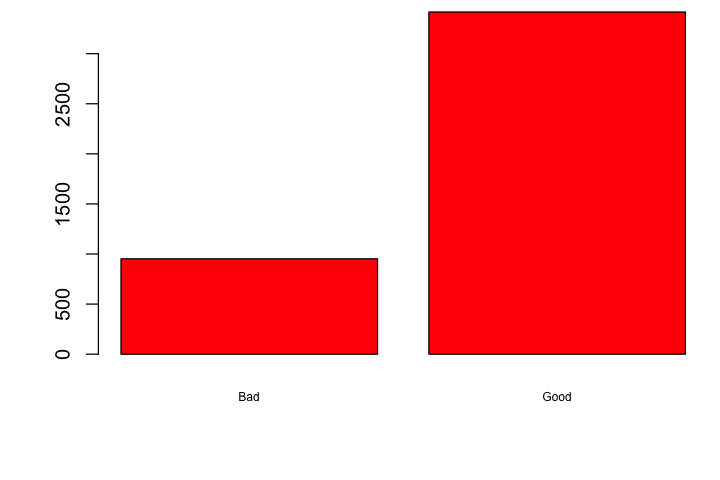

In [9]:
# Visualise attribute values -> choose bar plot for factor variables
mar <- par("mar")
mar[c(3,4)] <- 0.5
par(mar=mar)
plot(viz_data$good_bad_flag, col="red", cex.names=0.6)

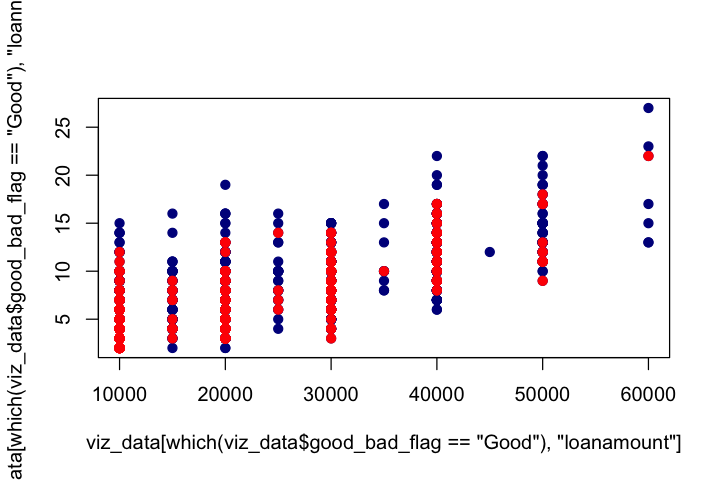

In [10]:
plot(viz_data[ which(viz_data$good_bad_flag=='Good'), "loanamount"], 
     viz_data[ which(viz_data$good_bad_flag=='Good'), "loannumber"],
    col = "darkblue", pch=21, bg = "darkblue")

points(viz_data[ which(viz_data$good_bad_flag=='Bad'), "loanamount"], 
     viz_data[ which(viz_data$good_bad_flag=='Bad'), "loannumber"], col = "red", pch=21, bg = "red")


In [11]:
summary(viz_data[c(3,6,7,8,10)])

   loannumber       loanamount       totaldue        termdays     good_bad_flag
 Min.   : 2.000   Min.   :10000   Min.   :10000   Min.   :15.00   Bad : 952    
 1st Qu.: 2.000   1st Qu.:10000   1st Qu.:13000   1st Qu.:30.00   Good:3416    
 Median : 4.000   Median :10000   Median :13000   Median :30.00                
 Mean   : 5.172   Mean   :17809   Mean   :21257   Mean   :29.26                
 3rd Qu.: 7.000   3rd Qu.:20000   3rd Qu.:24500   3rd Qu.:30.00                
 Max.   :27.000   Max.   :60000   Max.   :68100   Max.   :90.00                

## Data Preparation
### Merge Datasets

In [12]:
all_data <- merge(train_demo_data, train_perf_data, by="customerid")

In [13]:
# Dataset attribute types
sapply(all_data, class)

customerid                  birthdate 
                  "factor"                   "factor" 
         bank_account_type              longitude_gps 
                  "factor"                  "numeric" 
              latitude_gps          bank_name_clients 
                 "numeric"                   "factor" 
       bank_branch_clients  employment_status_clients 
                  "factor"                   "factor" 
level_of_education_clients               systemloanid 
                  "factor"                  "integer" 
                loannumber               approveddate 
                 "integer"                   "factor" 
              creationdate                 loanamount 
                  "factor"                  "numeric" 
                  totaldue                   termdays 
                 "numeric"                  "integer" 
                referredby              good_bad_flag 
                  "factor"                   "factor"

### Feature Extraction

In [14]:
all_data <- all_data[c("bank_account_type","bank_name_clients","employment_status_clients",
                         "level_of_education_clients", "loannumber", "loanamount", "termdays", "good_bad_flag")]
head(all_data)

bank_account_type bank_name_clients  employment_status_clients
1 Savings           GT Bank            Permanent                
2 Other             Standard Chartered Permanent                
3 Savings           GT Bank            Permanent                
4 Savings           First Bank         Permanent                
5 Other             Access Bank        Permanent                
6 Other             Diamond Bank       Permanent                
  level_of_education_clients loannumber loanamount termdays good_bad_flag
1 Primary                     2         10000      15       Bad          
2 Graduate                    5         30000      60       Good         
3 Graduate                    8         20000      30       Good         
4 Secondary                   9         30000      60       Good         
5                            10         20000      30       Good         
6 Post-Graduate              12         30000      30       Good

In [15]:
# Check for missing values
sapply(all_data, function(x) sum(is.na(x)))

bank_account_type          bank_name_clients 
                         0                          0 
 employment_status_clients level_of_education_clients 
                         0                          0 
                loannumber                 loanamount 
                         0                          0 
                  termdays              good_bad_flag 
                         0                          0

In [16]:
# Dataset dimensions
cat('Dim: ', dim(all_data), '\n\n')

sapply(all_data, function(x) length(unique(x)))

Dim:  3277 8 



bank_account_type          bank_name_clients 
                         3                         18 
 employment_status_clients level_of_education_clients 
                         7                          5 
                loannumber                 loanamount 
                        22                          9 
                  termdays              good_bad_flag 
                         4                          2

### Create Validation Dataset
In machine learning, you use some of your data to train the model, and withold some data to validate the model. Validation is important to ensure that your model performs well on new data, not only on the data that you used for training. The validation set is different to the test set, which Zindi uses to evaluate your model performance.

In [90]:
set.seed(27)

# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(all_data$good_bad_flag, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- all_data[-validation_index,]
# use the remaining 80% of data to training and testing the models
train_data <- all_data[validation_index,]
dim(train_data)

[1] 2623    8

### Prepare Test Dataset

In [91]:
test_data <- merge(test_demo_data, test_perf_data, by="customerid")
test_data <- test_data[c("customerid","bank_account_type","bank_name_clients","employment_status_clients",
                         "level_of_education_clients", "loannumber", "loanamount", "termdays")]

### Visualise Training Data

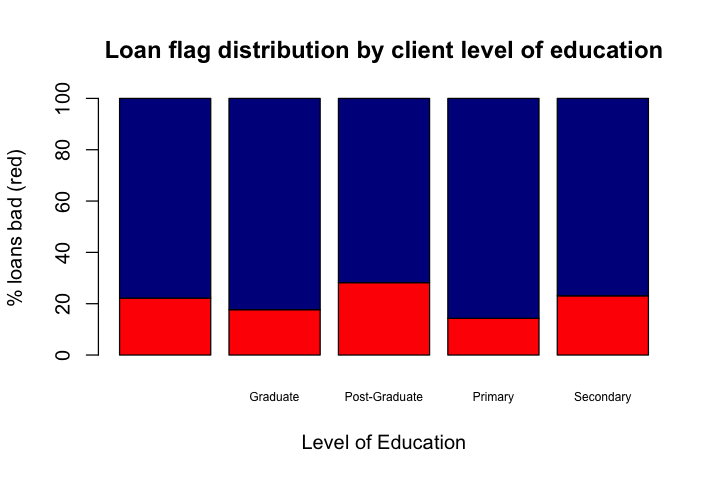

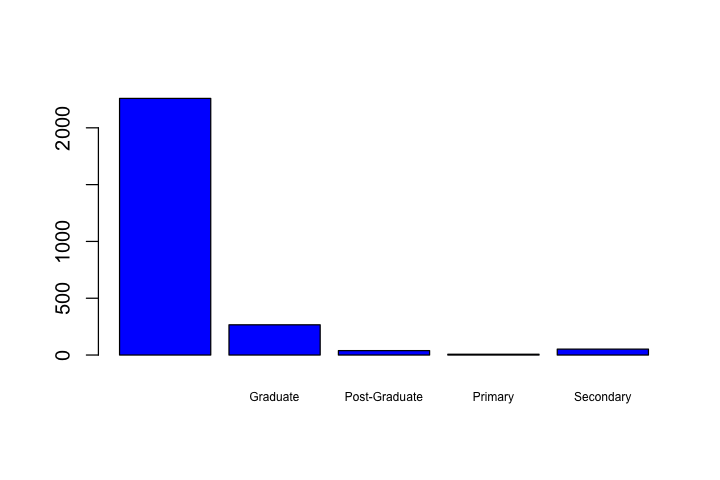

In [92]:
counts <- table(train_data$good_bad_flag, train_data$level_of_education_clients)
barplot(prop.table(counts, 2)*100, main="Loan flag distribution by client level of education",
  xlab="Level of Education", ylab="% loans bad (red)", col=c("red","darkblue"), cex.names=0.6)

plot(train_data$level_of_education_clients, col="blue", cex.names=0.6)

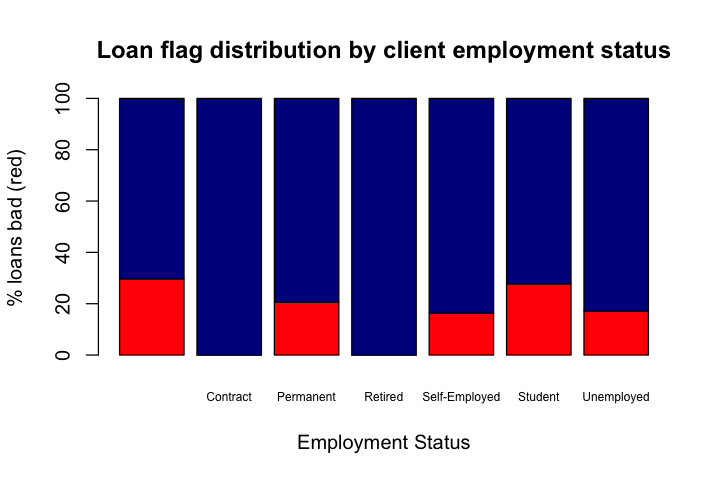

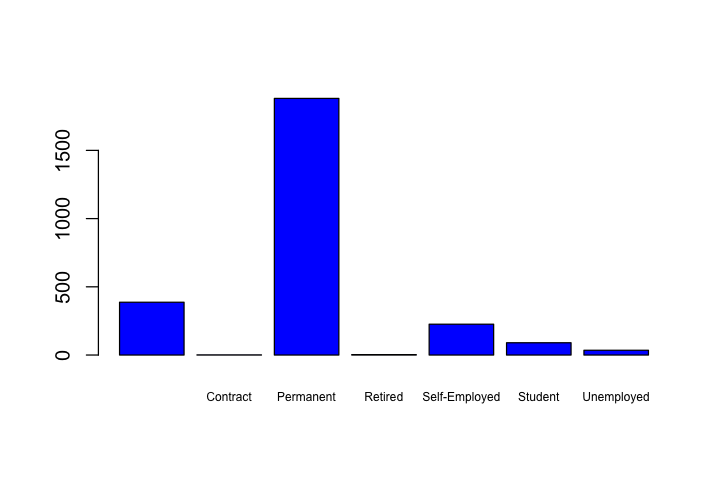

In [93]:
# Visualise attribute values -> choose bar plot for factor variables
counts <- table(train_data$good_bad_flag, train_data$employment_status_clients)
barplot(prop.table(counts, 2)*100, main="Loan flag distribution by client employment status",
  xlab="Employment Status", ylab="% loans bad (red)", col=c("red","darkblue"), cex.names=0.6)

plot(train_data$employment_status_clients, col="blue", cex.names=0.6)

## Build Model
We will use logistic regression to model the good_bad_flag feature as a function of our 7 predictors using the 2099 observations of the training dataset.

In [94]:
logitmodel <- glm(good_bad_flag ~ bank_account_type + bank_name_clients + employment_status_clients +
                  level_of_education_clients + loannumber + loanamount + termdays, family = "binomial",
                data=train_data)

In [106]:
importance <- data.frame(varImp(logitmodel))
importance$attribute <- rownames(importance)
orderedimp <- importance[order(importance$Overall, decreasing = TRUE),]
rownames(orderedimp) <- NULL
orderedimp

Overall    attribute                              
1  4.71820876 loanamount                             
2  3.49517510 employment_status_clientsPermanent     
3  3.23415128 termdays                               
4  2.35747031 bank_name_clientsDiamond Bank          
5  2.25156258 level_of_education_clientsPost-Graduate
6  1.66899252 loannumber                             
7  1.65030289 bank_name_clientsStanbic IBTC          
8  1.41947687 employment_status_clientsSelf-Employed 
9  1.27658124 employment_status_clientsUnemployed    
10 1.21120050 bank_name_clientsSterling Bank         
11 1.14346008 bank_name_clientsEcoBank               
12 1.14146025 bank_account_typeSavings               
13 1.08689485 level_of_education_clientsGraduate     
14 1.07164944 level_of_education_clientsSecondary    
15 0.98552400 bank_name_clientsSkye Bank             
16 0.96845775 bank_name_clientsStandard Chartered    
17 0.94913127 bank_name_clientsWema Bank             
18 0.73280827 bank_name_clientsHeritage Bank         
19 0.61672154 bank_name_clientsUnity Bank            
20 0.42280440 employment_status_clientsStudent       
21 0.40231448 bank_name_clientsGT Bank               
22 0.39152331 bank_name_clientsFirst Bank            
23 0.36734443 bank_name_clientsKeystone Bank         
24 0.35517195 bank_name_clientsUnion Bank            
25 0.25309899 bank_name_clientsFidelity Bank         
26 0.24283905 bank_name_clientsZenith Bank           
27 0.22904960 bank_name_clientsUBA                   
28 0.13754012 bank_account_typeOther                 
29 0.12968451 bank_name_clientsFCMB                  
30 0.04719057 level_of_education_clientsPrimary      
31 0.04091745 employment_status_clientsRetired       
32 0.02309731 employment_status_clientsContract

In [114]:
# Use validation data to evaluate model performance
pred <- predict(logitmodel, newdata = validation)
summary(pred)

# Recode factors
y_pred_num <- ifelse(pred > 0.5, 1, 0)
y_pred <- factor(y_pred_num, levels=c(0, 1))
y_act <- validation$good_bad_flag
y_act <- recode(y_act, Good = 1, Bad = 0)

# Accuracy
mean(y_pred == y_act) 
#confusionMatrix(y_pred, y_act)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.01935  0.99283  1.25004  1.33601  1.62170 15.04155 

[1] 0.7721713

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1978  0.9960  1.2543  1.3694  1.6739 13.4917 

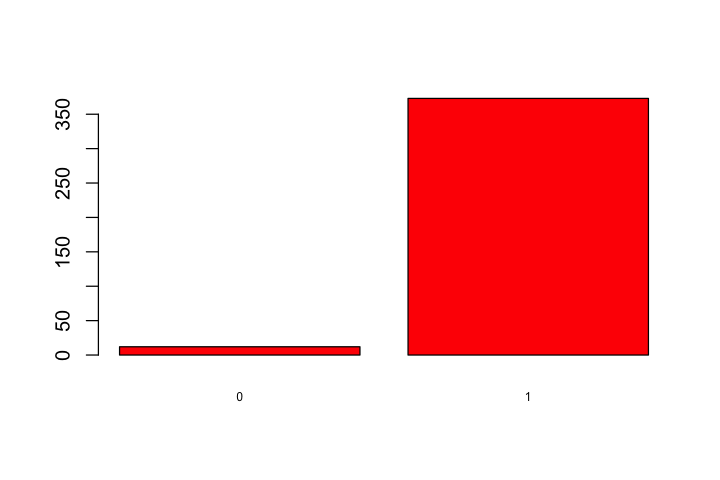

In [144]:
final_pred <- predict(logitmodel, newdata = test_data)

# Recode factors
final_y_pred_num <- ifelse(final_pred > 0.5, 1, 0)
final_y_pred <- factor(y_pred_num, levels=c(0, 1))

summary(final_pred)
plot(final_y_pred, col="red", cex.names=0.6)

## Prepare Submission

In [145]:
test_data$good_bad_flag <- final_y_pred

In [146]:
submission <- test_data[c(1,9)]
head(submission)

customerid                       good_bad_flag
1 8a85881053bc33670153c79e8e84571a 1            
2 8a85881053bc33670153c7a0e6ee582e 1            
3 8a85881a5420ebf101543716beee1039 1            
4 8a85883353e2e4e40153eca57a9855c6 1            
5 8a85884e548fad6501549e6d40590168 1            
6 8a858887545183ca015458c977db7bd2 1

In [147]:
subset(submission, good_bad_flag == 0)

customerid                       good_bad_flag
28  8a858970548359cc0154856f47c73b81 0            
32  8a8589b953bc23f70153bcb44fc40b19 0            
72  8a858e345bd96da8015be325004232e3 0            
127 8a858e7c588604a401589940135a58fd 0            
128 8a858e7d5b591490015b59618de419b4 0            
137 8a858e905a8fc7af015a903b5fb63073 0            
178 8a858ee05a6b7d75015a6f9509d049af 0            
241 8a858f305c8dd672015c9b6de9735c21 0            
249 8a858f3a58a6d6720158aa1561f233c0 0            
277 8a858f615591c2cc0155965e44ff3633 0            
356 8a858fd75bc96a6f015bcab7caf06c3f 0            
371 8a858fee5863a04901586c7547896071 0

In [148]:
write_csv(submission, "submission.csv")